In this notebook, we generate the insets of Fig. 1 of the main text.

In [ ]:
import pandas as pd
from qutip import *
from scipy.sparse.linalg import eigs
settings.core = CoreOptions(default_dtype='CSR')
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from matplotlib import rc
import matplotlib as mpl
import scipy.optimize as opt
rc('text', usetex=True)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIX"
mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["legend.borderpad"] = 0.15
mpl.rcParams["font.size"] = 8

Obtain the data for Fig. 1(e).

In [ ]:
N=6 # choose the system size N
omega_c=N/2 # critical frequency
# Collective spin operators for the sensors
S_x = jmat(N/2, 'x')
S_y = jmat(N/2, 'y')
S_z = jmat(N/2, 'z')
S_p = jmat(N/2, '+')
S_m = jmat(N/2, '-')
idenJ = qeye(S_z.shape[0])

ratio  = 0.5 # \omega/\omega_c = 0.5 --> stationary regime
omega   = ratio*omega_c
ys=[]
phis = np.linspace(-np.pi,np.pi,100)
for phi in phis: # iterate over homodyne angles phi-beta
    Ham     = omega*S_x
    Jump    = S_m
    Liou    = liouvillian(Ham, [Jump])
    rho_ss  = steadystate(Liou, method='direct')
    hom_op = (np.exp(-1j*phi)*Jump + np.exp(1j*phi)*Jump.dag())
    ys.append(np.real((hom_op*rho_ss).tr()))

Plot Fig. 1(e).

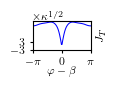

In [7]:
fig , ax = plt.subplots(1,1,figsize=(0.75,0.375))
ax.plot(phis, ys, 'b-', linewidth=.75)
ax.tick_params(axis='both', length=2)
ax.set_xlim(-np.pi,np.pi)
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', '0',r'$\pi$'])
ax.set_yticks([-N/2, N/2])
ax.set_ylabel(r'$J_T$')
ax.set_xlabel(r'$\varphi-\beta$')
ax.yaxis.set_label_coords(1.25,.45)  
ax.xaxis.set_label_coords(0.5, -0.6)
ax.text(0,1,r'$\times \kappa^{1/2}$', transform=ax.transAxes, va='bottom', ha='left')
fig.savefig('hom_current_vs_dphi_N6.svg', dpi=1000)

Generate data for Fig. 1(c).

In [ ]:
N=6 # choose the system size N
omega_c=N/2 # critical frequency
# Collective spin operators 
S_x = jmat(N/2, 'x')
S_y = jmat(N/2, 'y')
S_z = jmat(N/2, 'z')
S_p = jmat(N/2, '+')
S_m = jmat(N/2, '-')
idenJ = qeye(S_z.shape[0])
# operators of the sensor system S_1
S_x1 = tensor(S_x, idenJ)
S_x2 = tensor(idenJ, S_x)
S_m1 = tensor(S_m, idenJ)
# operators of the decoder system S_2
S_m2 = tensor(idenJ, S_m)
S_p1 = tensor(S_p, idenJ)
S_p2 = tensor(idenJ, S_p)
# identity
idenJ = tensor(idenJ, idenJ)

ratio   = 4 # \omega/\omega_c = 4 --> time-crystal regimes
omega   = ratio*omega_c
ys=[]
dphis   = np.linspace(-np.pi,np.pi,100)
for dphi in dphis: # iterate over phase differences phi-phi'
    Ham     = omega*(S_x1+S_x2) - 0.5j*(np.exp(-1j*dphi)*S_p2*S_m1
                                         - np.exp(1j*dphi)*S_m2*S_p1)
    Jump    = np.exp(-1j*dphi)*S_m1+S_m2
    Liou    = liouvillian(Ham, [Jump])
    rho_ss  = steadystate(Liou, method='direct')
    ys.append(abs((Jump.dag()*Jump*rho_ss).tr()))

Plot Fig. 1(c).

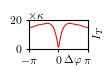

In [6]:
fig , ax = plt.subplots(1,1,figsize=(.75,.375))
ax.plot(dphis, ys, 'r-', linewidth=.75)
ax.set_xlim([-np.pi,np.pi])
ax.set_xticks([-np.pi, 0, np.pi])
ax.set_xticklabels([r'$-\pi$', '0', r'$\pi$'])
ax.set_yticks([0,20])
ax.tick_params(axis='both', length=2)
ax.set_ylabel(r'$I_T$')
ax.set_xlabel(r"$\Delta\varphi$")
ax.yaxis.set_label_coords(1.25, 0.5)  
ax.xaxis.set_label_coords(0.75, -0.25)
ax.text(0,1, r'$\times \kappa$', transform=ax.transAxes,
        verticalalignment='bottom', horizontalalignment='left')
fig.savefig('int_vs_dphi_N6.svg', dpi=1000, bbox_inches='tight')